# Import Library

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 5
from sklearn.metrics import mean_absolute_error

# Generate Sin(x)

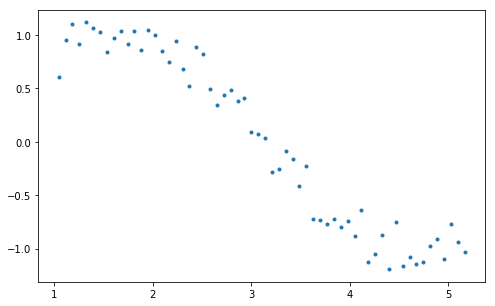

In [2]:
# define input array with angles from 60deg to 300deg converted to radians
X = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(100)  #Setting seed for reproducability
y = np.sin(X) + np.random.normal(0,0.15,len(X))
X = X.reshape(60,-1)
y = y.reshape(60,-1)
data = pd.DataFrame(np.column_stack([X,y]),columns=['X','y'])
plt.plot(data['X'],data['y'],'.')

In [3]:
from sklearn.svm import SVR
def example_svm_regression(X, y, plot_dict, kernel, C = 1):
    
    for params in plot_dict:
        # define estimator object
        kernel_dict = {'linear':SVR(kernel='linear', C=params),
                       'poly':SVR(kernel='poly', C=C, degree=params),
                       'rbf':SVR(kernel='rbf', C=C, gamma=params)}

        # fit the model
        if kernel in kernel_dict:
            model = kernel_dict[kernel]
            model.fit(X, y)
            y_pred = model.predict(X)
            mae = mean_absolute_error(y_pred, y)

        # check if a plot is to be made for the entered power
        plt.subplot(plot_dict[params])
        plt.tight_layout()
        plt.plot(X, y,'.')
        plt.plot(X ,y_pred)
        if kernel == 'linear':
            plt.title('Plot for C: %.2f'%params + '\n' + 'mae:%.2f'%mae)
        elif kernel == 'poly':
            plt.title('Plot for degree: %.2f'%params + '\n' + 'mae:%.2f'%mae)
        elif kernel == 'rbf':
            plt.title('Plot for gamma: %.2f'%params + '\n' + 'mae:%.2f'%mae)    
    

# RBF SVR：看圖是否看得出來gamma多少是比較好的選擇？

/Users/Jacklin/anaconda3/envs/tensor_flow_py3p5/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


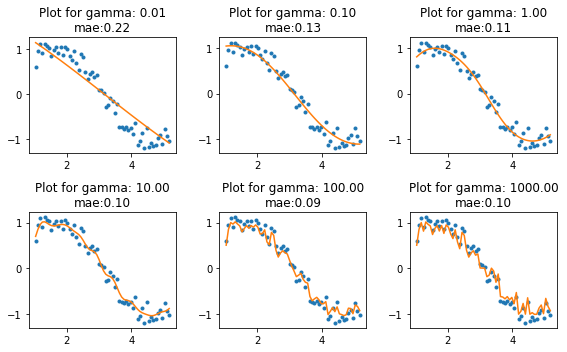

In [4]:
plot_dict = {0.01:231,0.1:232,1:233,10:234,100:235,1000:236}
example_svm_regression(X, y, plot_dict, kernel='rbf')

# 利用5-folds Cross Validation算不同gamma的MAE

In [5]:
from sklearn.model_selection import KFold
def cross_validation(X, y, folds, gamma):
    kf = KFold(n_splits=folds, random_state=None, shuffle=False)
    evaluation = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = SVR(kernel='rbf', C=1, gamma=gamma)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_pred, y_test)
        evaluation.append(mae)
    return evaluation

In [6]:
folds = 5
cv = pd.DataFrame()
for gamma in np.logspace(-2, 3, 6).tolist(): #generate gamma from 1e-2~1e3
    #print(gamma)
    cv[str(gamma)] = cross_validation(X, y, folds, gamma)

/Users/Jacklin/anaconda3/envs/tensor_flow_py3p5/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


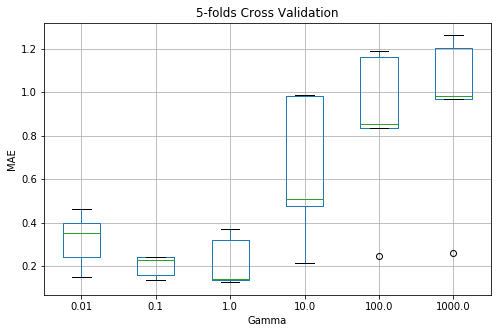

In [7]:
plt.title('5-folds Cross Validation')
plt.xlabel('Gamma')
plt.ylabel('MAE')
cv.boxplot()